# Продвинутое машинное обучение: ДЗ 1

Студент: Синяев Максим

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from scipy.stats import multivariate_normal

## Часть I: О теореме Байеса
Первая часть состоит из двух вопросов и одного задания. Смысл её в том, чтобы провести вероятностные рассуждения в ситуациях, когда модель сама по себе очень простая, но её ещё надо правильно построить, правильно отобразить жизненную ситуацию. Поэтому на первые два вопроса рекомендую давать развёрнутые ответы; эти ответы лучше писать прямо в ноутбуке, LaTeX в jupyter работает на вполне достаточном для нас уровне.


Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!

### Вопрос 1
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

**Ответ**: Вероятности которые указал прокурор не являются сопряженными, то есть из вероятности что подсудимый невиновен, имея при этом редкую группу крови нельзя вычислить вероятность того что он виновен, вместо 99% прокурор должен был посчитать по теореме Байеса:

$$P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}$$
```
где А - виновен, B - наличие редкой группы крови
```
вместо этого же прокурор посчитал $P(B|\overline{A})$ - вероятность того что подсудимый имеет редкую группу крови, при том что он невиновен, после чего получившуюся вероятность вычел из 100% и получил 99%, хотя данные вероятности не являются сопряженными.

### Вопрос 2
Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?


**Ответ**: Адвокат в своем утверждении оценил вероятность случайно взятого человека с редкой группой крови быть убийцей, в то время как в суде было бы корректнее рассматривать вероятность того что обвиняемый с редкой группой является убийцей. Возможно половина из указанных адвокатом людей просто не могли совершить убийство (алиби, отсутствие в городе итд), что не учитывается адвокатом в расчетах. Поэтому адвокату следовало оценить вероятность того, что обвиняемый с редкой группой крови является убийцей.

### Вопрос 3
**Условия:**

Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.

Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).

Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


**Решение**

Для начала напишем формулу по которой можно рассчитать вероятность того что человек дейтсвительно болен при положительном тесте:
```
A - тест положителен
B - человек болен
```
$$P(B|A) = \frac{P(A|B) \times P(B)}{P(A)}$$

Значения в числители нам известны, поэтому теперь нам необходимо выразить P(A) через известные величины:

$$P(A) = P(A|B) \times P(B) + P(A|\overline{B}) \times P(\overline{B})$$

In [3]:
P_ILLNESS = 0.01
P_FALSE_POS = 0.05
P_FALSE_NEG = 0.05

def get_possib_positive_test_positive_illness(p_false_pos, p_false_negative):
    p_true_pos = 1 - p_false_pos
    p_true_negative = 1 - p_false_negative
    positive_pos = (p_true_pos * P_ILLNESS )/ (p_true_pos * P_ILLNESS + p_false_pos * (1 - P_ILLNESS))
    return positive_pos

def get_possib_negative_test_negative_illness(p_false_pos, p_false_negative):
    p_true_pos = 1 - p_false_pos
    p_true_negative = 1 - p_false_negative
    negative_pos = p_true_negative * (1 - P_ILLNESS) / (p_false_negative * P_ILLNESS + p_true_negative * (1 - P_ILLNESS))
    return negative_pos

def get_possib_negative_test_positive_illness(p_false_pos, p_false_negative):
    p_true_pos = 1 - p_false_pos
    p_true_negative = 1 - p_false_negative
    negative_pos = p_false_negative * P_ILLNESS / (p_false_negative * P_ILLNESS + p_true_negative * (1 - P_ILLNESS))
    return negative_pos

In [4]:
# Проверим правильность формулы, при исходных данных вероятность болезни при положительном тесте должна быть 16%
assert round(get_possib_positive_test_positive_illness(P_FALSE_POS, P_FALSE_NEG), 2) == 0.16

In [5]:
# Расчитаем апомтериорные вероятности для исходных данных
print(f"Вероятность болезни при положительном тесте {get_possib_positive_test_positive_illness(P_FALSE_POS, P_FALSE_NEG) * 100:.2f}%")
print(f"Вероятность болезни при отрицательном тесте {get_possib_negative_test_positive_illness(P_FALSE_POS, P_FALSE_NEG) * 100:.2f}%")

Вероятность болезни при положительном тесте 16.10%
Вероятность болезни при отрицательном тесте 0.05%


In [6]:
# Создадим массив дискретных значений для вероятности ошибки
false_linspase = np.linspace(0.05, 0.001, 200)
false_linspase_percent = false_linspase * 100

#### График распределения апостериорной вероятности болезни в зависимости от величины ошибки тестирования

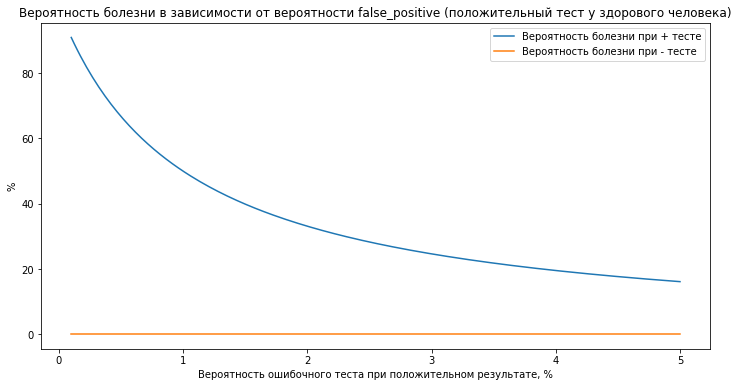

In [7]:
plt_name = "Вероятность болезни в зависимости от вероятности false_positive (положительный тест у здорового человека)"
plt.figure(figsize=(12, 6))
y1 = get_possib_positive_test_positive_illness(false_linspase, P_FALSE_NEG) * 100
y2 = np.repeat(get_possib_negative_test_positive_illness(false_linspase, P_FALSE_NEG) * 100, false_linspase.shape[0])
plt.plot(false_linspase_percent, y1, label='Вероятность болезни при + тесте')
plt.plot(false_linspase_percent, y2, label='Вероятность болезни при - тесте')
plt.title(plt_name)
plt.xlabel('Вероятность ошибочного теста при положительном результате, %')
plt.ylabel('%')
plt.legend()
plt.show()

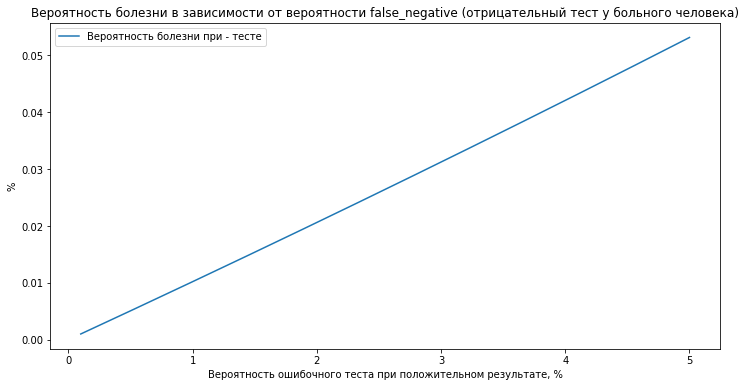

In [8]:
plt_name = "Вероятность болезни в зависимости от вероятности false_negative (отрицательный тест у больного человека)"
plt.figure(figsize=(12, 6))
# y1 = np.repeat(get_possib_positive_test_positive_illness(P_FALSE_POS, false_linspase) * 100, false_linspase.shape[0])
y2 = get_possib_negative_test_positive_illness(P_FALSE_POS, false_linspase) * 100
# plt.plot(false_linspase_percent, y1, label='Вероятность болезни при + тесте')
plt.plot(false_linspase_percent, y2, label='Вероятность болезни при - тесте')
plt.title(plt_name)
plt.xlabel('Вероятность ошибочного теста при положительном результате, %')
plt.ylabel('%')
plt.legend()
plt.show()

**Выводы**: как видно из графиков и расчетов вероятность получить отрицательный тест при болезни составляет очень малое значение даже при исходных данных (0.05%), в то время как получить положительный тест при наличии болезни составляет всего лишь 16%, что можно считать очень низкой точностью теста, поэтому я бы порекомендовал работать в сторону уменьшения false_positive ошибок, так как небольшое изменение вероятности ошибки позволяет очень сильно повысить точность тестирования, что связано с редкостью болезни среди населения, в отличии от вероятности наличия болезни при отрицательном тесте, снижение вероятности false_negative ошибок очень слабо влияет на уменьшение ошибки.

### Часть 2

Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.


In [9]:
start_date = datetime.date(2020, 3, 3)
str(start_date)

'2020-03-03'

In [10]:
corona_df = pd.read_csv('owid-covid-data.csv')

In [11]:
corona_df['date'] = pd.to_datetime(corona_df['date'])

In [12]:
corona_df_ru = corona_df.query('location == "Russia"').query('date >= @start_date')

In [13]:
corona_df_ru['new_cases'] = corona_df_ru['new_cases'].replace({0.0: 1.})
corona_df_ru['day_of_year'] = corona_df_ru['date'].dt.dayofyear
corona_df_ru['year'] = corona_df_ru['date'].dt.year
MIN_DAY_OF_YEAR = corona_df_ru.query('year == 2020')['day_of_year'].min()
# MIN_DAY_OF_YEAR = 0
corona_df_ru['day_n'] = corona_df_ru.apply(lambda x: x['day_of_year'] - MIN_DAY_OF_YEAR if 
                                           x['year'] == 2020 else x['day_of_year'] + 366 - MIN_DAY_OF_YEAR, axis=1)

In [14]:
train_df = corona_df_ru.iloc[:50]
val_df = corona_df_ru.iloc[50:]

In [15]:
X = corona_df_ru['day_n'].values
y_total = corona_df_ru['total_cases'].values
y_new = corona_df_ru['new_cases'].values

In [16]:
X_train, X_val = train_df['day_n'].values, val_df['day_n'].values
y_total_train, y_total_val = train_df['total_cases'].values, val_df['total_cases'].values
y_new_train, y_new_val = train_df['new_cases'].values, val_df['new_cases'].values

In [17]:
corona_df_ru

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,day_of_year,year,day_n
52775,RUS,Europe,Russia,2020-03-03,3.0,1.0,0.143,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,63,2020,0
52776,RUS,Europe,Russia,2020-03-04,3.0,1.0,0.143,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,64,2020,1
52777,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,65,2020,2
52778,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,66,2020,3
52779,RUS,Europe,Russia,2020-03-07,13.0,1.0,1.571,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,67,2020,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53130,RUS,Europe,Russia,2021-02-21,4117992.0,12568.0,13069.429,81926.0,409.0,443.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,52,2021,355
53131,RUS,Europe,Russia,2021-02-22,4130447.0,12455.0,12848.857,82255.0,329.0,435.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,53,2021,356
53132,RUS,Europe,Russia,2021-02-23,4142126.0,11679.0,12655.857,82666.0,411.0,429.571,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,54,2021,357
53133,RUS,Europe,Russia,2021-02-24,4153735.0,11609.0,12510.143,83044.0,378.0,418.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,55,2021,358


Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

А. Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.


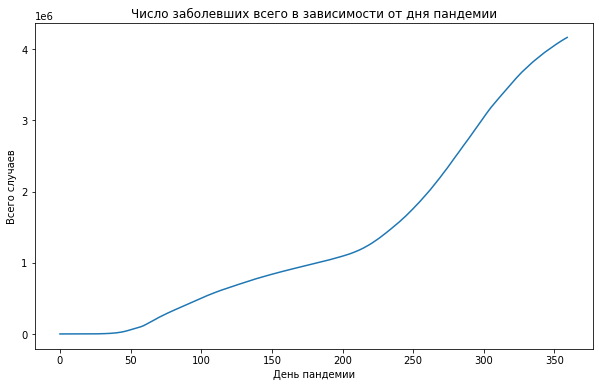

In [18]:
# Построим графики
plt.figure(figsize=(10, 6))
plt.plot(corona_df_ru['day_n'], corona_df_ru['total_cases'])
plt.title('Число заболевших всего в зависимости от дня пандемии')
plt.xlabel('День пандемии')
plt.ylabel('Всего случаев')
plt.show()

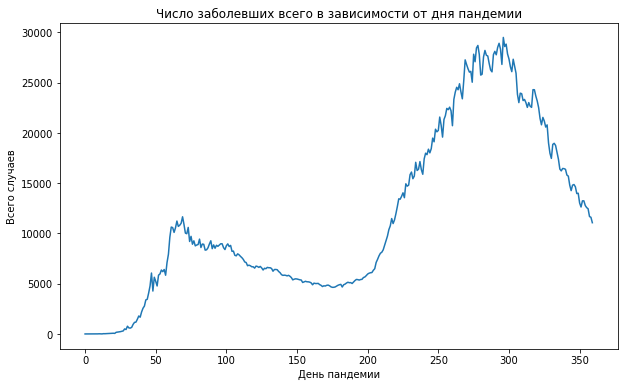

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(corona_df_ru['day_n'], corona_df_ru['new_cases'])
plt.title('Число заболевших всего в зависимости от дня пандемии')
plt.xlabel('День пандемии')
plt.ylabel('Всего случаев')
plt.show()

### Построим линейную регрессию для предсказания логарифма числа заболевших

In [20]:
TRAIN_PERIOD = 50

In [21]:
y_total_log = np.log(y_total)
y_new_log = np.log(y_new)

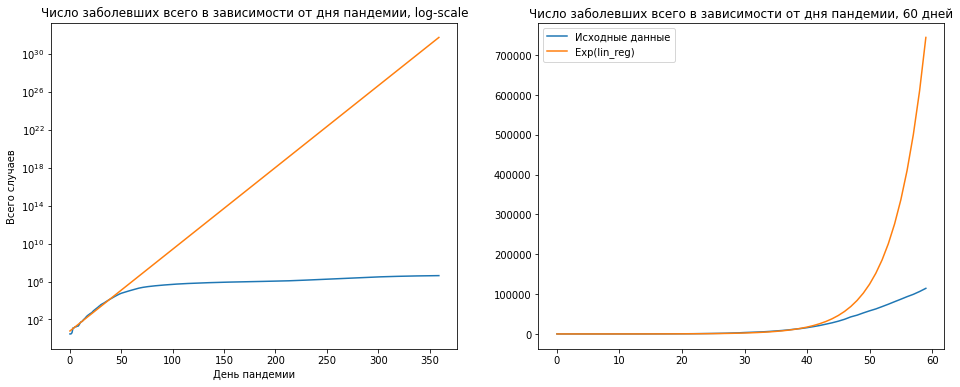

In [22]:
model_total = Ridge(alpha=0.001, fit_intercept=True).fit(X[:TRAIN_PERIOD].reshape(-1, 1), y_total_log[:TRAIN_PERIOD])
y_pred = model_total.predict(X.reshape(-1, 1))
# Построим графики
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 2, 1)
plt.plot(corona_df_ru['day_n'], corona_df_ru['total_cases'], label='Исходные данные')
plt.plot(X, np.exp(y_pred), label='Exp(lin_reg)')
plt.title('Число заболевших всего в зависимости от дня пандемии, log-scale')
plt.xlabel('День пандемии')
plt.ylabel('Всего случаев')
plt.yscale('log')
ax = fig.add_subplot(1, 2, 2)
# График в обычной шкале с ограничением количества дней
MAX_DAYS = 60
plt.title(f'Число заболевших всего в зависимости от дня пандемии, {MAX_DAYS} дней')
plt.plot(corona_df_ru['day_n'].iloc[:MAX_DAYS], corona_df_ru['total_cases'].iloc[:MAX_DAYS], label='Исходные данные')
plt.plot(X[:MAX_DAYS], np.exp(y_pred)[:MAX_DAYS], label='Exp(lin_reg)')
plt.legend()
plt.show()

In [28]:
posterior_noise_std_total = np.std(y_total_log[:TRAIN_PERIOD] - y_pred[:TRAIN_PERIOD], ddof=1)
posterior_noise_std_total

0.35258587251032214

#### Предсказание new_cases

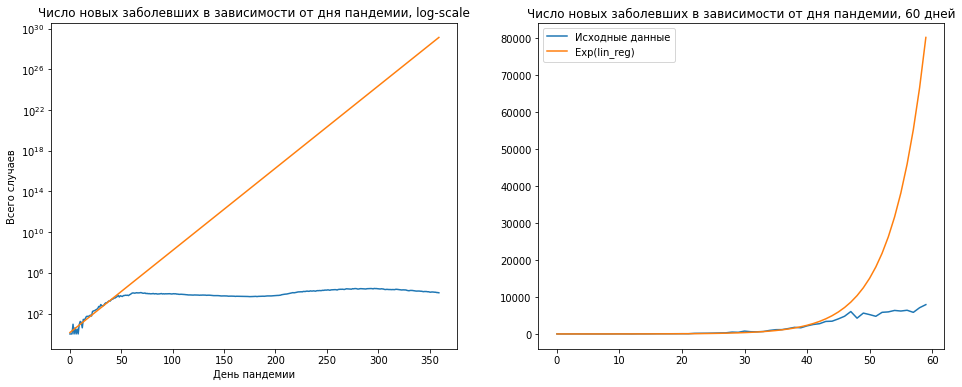

In [29]:
model_new = Ridge(alpha=0.001, fit_intercept=True).fit(X[:TRAIN_PERIOD].reshape(-1, 1), y_new_log[:TRAIN_PERIOD])
y_pred = model_new.predict(X.reshape(-1, 1))
# Построим графики
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 2, 1)
plt.plot(corona_df_ru['day_n'], corona_df_ru['new_cases'], label='Исходные данные')
plt.plot(X, np.exp(y_pred), label='Exp(lin_reg)')
plt.title('Число новых заболевших в зависимости от дня пандемии, log-scale')
plt.xlabel('День пандемии')
plt.ylabel('Всего случаев')
plt.yscale('log')
ax = fig.add_subplot(1, 2, 2)
# График в обычной шкале с ограничением количества дней
MAX_DAYS = 60
plt.title(f'Число новых заболевших в зависимости от дня пандемии, {MAX_DAYS} дней')
plt.plot(corona_df_ru['day_n'].iloc[:MAX_DAYS], corona_df_ru['new_cases'].iloc[:MAX_DAYS], label='Исходные данные')
plt.plot(X[:MAX_DAYS], np.exp(y_pred)[:MAX_DAYS], label='Exp(lin_reg)')
plt.legend()
plt.show()

In [30]:
posterior_noise_std_new = np.std(y_new_log[:TRAIN_PERIOD] - y_pred[:TRAIN_PERIOD], ddof=1)
posterior_noise_std_new

0.6021297649663017

**Б.** Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

В качестве априорного распределения возьмем "широкое" нормальное распределение например с сигмой равной 20 и мат ожиданием в 0. В качестве сигмы для шума возьмем выборочное скво для ошибки для моделей построенных ранее.

In [32]:
# Функции из лекции
def get_likelihood(px, py, sigma=.5):
    return lambda x : np.exp(-(x[0] + x[1]*px - py) ** 2) / (2 * sigma * np.sqrt(2.*np.pi))

def bayesian_update(mu, sigma, x, y, sigma_noise=.25):
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

def myplot_sample_lines(mu, sigma, n=20, points=None, len=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    # plt.axis('equal')
    for w in my_w:
        plt.plot(X[:len], w[0] + w[1]*X[:len], 'k-', lw=.4)
    if not points is None:
        plt.scatter(X[:len], points[:len], marker='*', s=200)

#### Вычисление апостериорного распределения параметров модели для total_cases

In [33]:
PRIOR_SIGMA = 20

mu_total, sigma_total = np.array([0, 0]), PRIOR_SIGMA * np.array([[1, 0], [0, 1]])

# Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)

for i in range(TRAIN_PERIOD):
    mu_total, sigma_total = bayesian_update(mu_total, sigma_total, X[i], y_total_log[i], sigma_noise=posterior_noise_std_total)

In [34]:
np.hstack([[model_total.intercept_], model_total.coef_])

array([1.82073762, 0.19829089])

#### Вычисление апостериорного распределения параметров модели для new_cases

In [36]:
PRIOR_SIGMA = 20

mu_new, sigma_new = np.array([0, 0]), PRIOR_SIGMA * np.array([[1, 0], [0, 1]])

# Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)

for i in range(TRAIN_PERIOD):
    mu_new, sigma_new = bayesian_update(mu_new, sigma_new, X[i], y_new_log[i], sigma_noise=posterior_noise_std_new)

In [38]:
np.hstack([[model_new.intercept_], model_new.coef_])

array([0.32068796, 0.18596307])

**В.** Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).


In [39]:
def transform_to_dayofyear(date: datetime.date):
    day = pd.to_datetime(date).dayofyear if date.year == 2020 else pd.to_datetime(date).dayofyear + 366
    return day

#### Засэмплируем множество моделей распределения для получения предсказаний для total_cases

In [40]:
# Приведем даты к формату номера дня, который сможет считать модель
point1 = datetime.date(2020, 5, 1)
point2 = datetime.date(2020, 6, 1)
point3 = datetime.date(2020, 9, 1)
points = [point1, point2, point3]

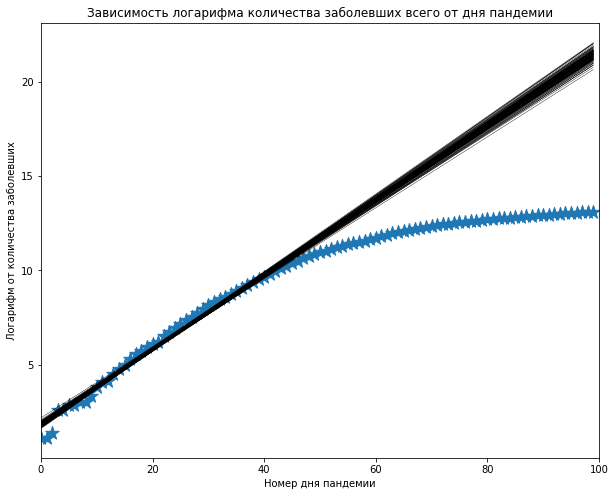

In [41]:
# График сэмплирования для визуализации
MAX_LEN = 100 # Количество учитываемых точек для графика

fig = plt.figure(figsize=(10, 8))
myplot_sample_lines(mu_total, sigma_total, 100, points=y_total_log, len=MAX_LEN)
plt.xlim((0, MAX_LEN))
plt.ylabel('Логарифм от количества заболевших')
plt.xlabel('Номер дня пандемии')
plt.title("Зависимость логарифма количества заболевших всего от дня пандемии")
plt.show()

Для 2020-05-01 дня количество всего заболевших примерно равно 209660627688.25323
Для 2020-06-01 дня количество всего заболевших примерно равно 101885592689278.23
Для 2020-09-01 дня количество всего заболевших примерно равно 1.0171747898742568e+22


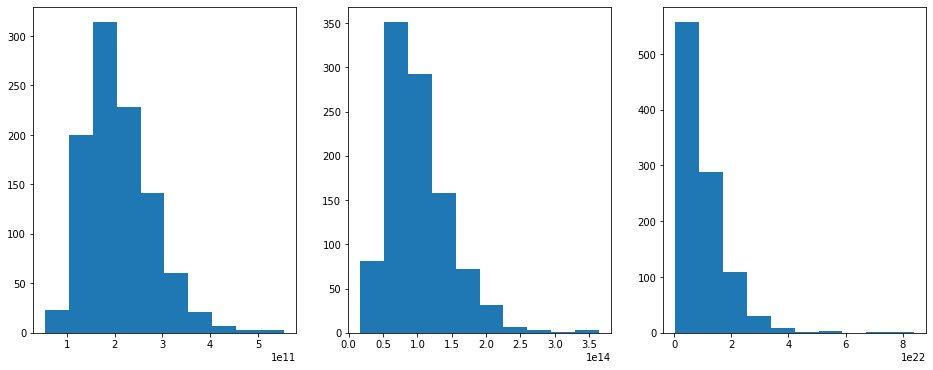

In [42]:
N_SAMPLES = 1000

fig = plt.figure(figsize=(16, 6))
weights = np.random.multivariate_normal(mu_total, sigma_total, N_SAMPLES)
for i, point in enumerate(points):
    ax = fig.add_subplot(1, 3, i + 1)
    y_pred = []
    point_trans = transform_to_dayofyear(point)
    for w in weights:
        y_pred.append(np.exp(w[0] + w[1] * point_trans))
    print(f"Для {point} дня количество всего заболевших примерно равно {np.mean(y_pred)}")
    plt.hist(np.round(y_pred, 2))

#### Засэмплируем множество моделей распределения для получения предсказаний для new_cases

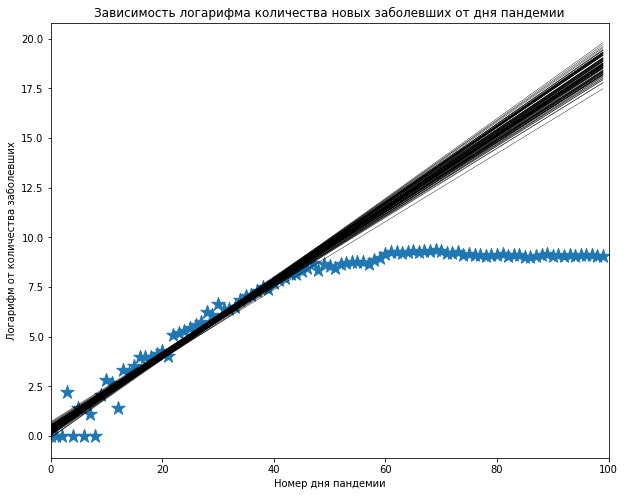

In [43]:
# График сэмплирования для визуализации
MAX_LEN = 100 # Количество учитываемых точек для графика

fig = plt.figure(figsize=(10, 8))
myplot_sample_lines(mu_new, sigma_new, 100, points=y_new_log, len=MAX_LEN)
plt.xlim((0, MAX_LEN))
plt.ylabel('Логарифм от количества заболевших')
plt.xlabel('Номер дня пандемии')
plt.title("Зависимость логарифма количества новых заболевших от дня пандемии")
plt.show()

Для 2020-05-01 дня количество новых заболевших примерно равно 11651995910.268496
Для 2020-06-01 дня количество новых заболевших примерно равно 4190427622899.315
Для 2020-09-01 дня количество новых заболевших примерно равно 1.976789443901559e+20


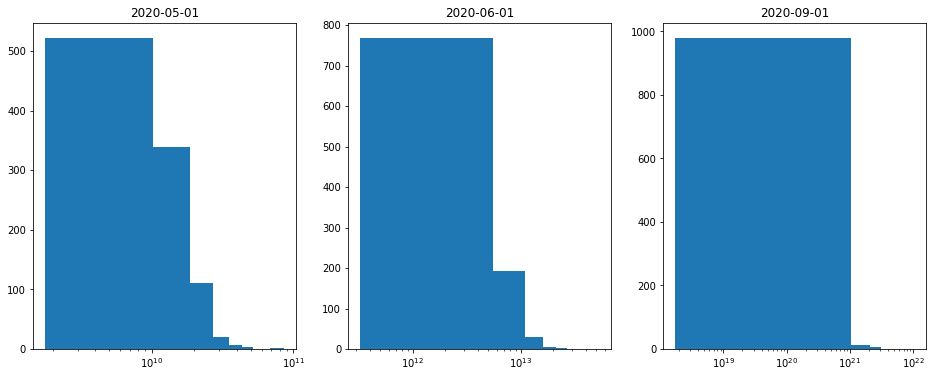

In [46]:
N_SAMPLES = 1000

fig = plt.figure(figsize=(16, 6))
weights = np.random.multivariate_normal(mu_new, sigma_new, N_SAMPLES)
for i, point in enumerate(points):
    ax = fig.add_subplot(1, 3, i + 1)
    y_pred = []
    point_trans = transform_to_dayofyear(point)
    for w in weights:
        y_pred.append(np.exp(w[0] + w[1] * point_trans))
    print(f"Для {point} дня количество новых заболевших примерно равно {np.mean(y_pred)}")
    plt.hist(np.round(y_pred, 2))
    plt.xscale('log')
    plt.title(f'{point}')
plt.show()

### 3. Часть 3
Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана:

#### Предсказание new_cases

In [109]:
X_gaus = np.vstack([X ** i for i in range(3)]).transpose()

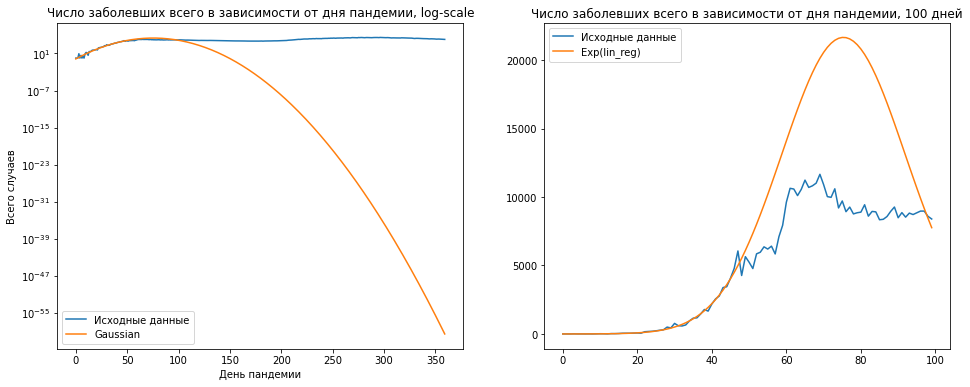

In [110]:
model_new = Ridge(alpha=0.001, fit_intercept=False).fit(X_gaus[:TRAIN_PERIOD], y_new_log[:TRAIN_PERIOD])
y_pred = model_new.predict(X_gaus)
# Построим графики
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 2, 1)
plt.plot(corona_df_ru['day_n'], corona_df_ru['new_cases'], label='Исходные данные')
plt.plot(X, np.exp(y_pred), label='Gaussian')
plt.title('Число заболевших всего в зависимости от дня пандемии, log-scale')
plt.xlabel('День пандемии')
plt.ylabel('Всего случаев')
plt.yscale('log')
plt.legend()
ax = fig.add_subplot(1, 2, 2)
# График в обычной шкале с ограничением количества дней
MAX_DAYS = 100
plt.title(f'Число заболевших всего в зависимости от дня пандемии, {MAX_DAYS} дней')
plt.plot(corona_df_ru['day_n'].iloc[:MAX_DAYS], corona_df_ru['new_cases'].iloc[:MAX_DAYS], label='Исходные данные')
plt.plot(X[:MAX_DAYS], np.exp(y_pred)[:MAX_DAYS], label='Exp(lin_reg)')
plt.legend()
plt.show()

In [111]:
posterior_noise_std_new = np.std(y_new_log[:TRAIN_PERIOD] - y_pred[:TRAIN_PERIOD], ddof=1)
posterior_noise_std_new

0.49413585857103903

Численно проинтегрируем результаты и сравним их с графиком заболевших всего

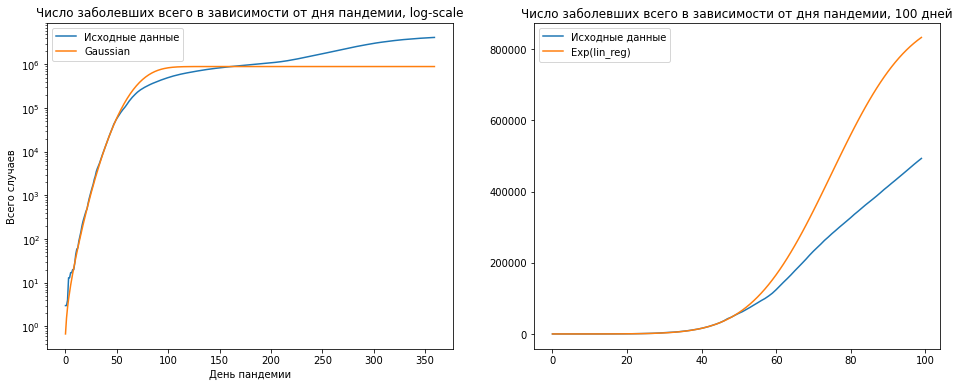

In [112]:
# Построим графики
y_pred_total = np.cumsum(np.exp(y_pred))
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X, corona_df_ru['total_cases'], label='Исходные данные')
plt.plot(X, y_pred_total, label='Gaussian')
plt.title('Число заболевших всего в зависимости от дня пандемии, log-scale')
plt.xlabel('День пандемии')
plt.ylabel('Всего случаев')
plt.yscale('log')
plt.legend()
ax = fig.add_subplot(1, 2, 2)
# График в обычной шкале с ограничением количества дней
MAX_DAYS = 100
plt.title(f'Число заболевших всего в зависимости от дня пандемии, {MAX_DAYS} дней')
plt.plot(X[:MAX_DAYS], corona_df_ru['total_cases'].iloc[:MAX_DAYS], label='Исходные данные')
plt.plot(X[:MAX_DAYS], np.cumsum(np.exp(y_pred[:MAX_DAYS])), label='Exp(lin_reg)')
plt.legend()
plt.show()

In [113]:
posterior_noise_std_total_gaus = np.std(y_total[:TRAIN_PERIOD] - y_pred_total[:TRAIN_PERIOD], ddof=1)
posterior_noise_std_total_gaus

242.96322295338223

**3.2.** Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.


In [114]:
def bayesian_update_gaus(mu, sigma, x, y, sigma_noise=.25):
    x_matrix = np.array([x])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

def myplot_sample_gaus(mu, sigma, n=20, points=None, len=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    # plt.axis('equal')
    for w in my_w:
        plt.plot(X[:len], np.cumsum(np.exp(w[0] * X_gaus[:len,0] + w[1] * X_gaus[:len,1] + w[2] * X_gaus[:len,2])), 'k-', lw=.4)
    if not points is None:
        plt.scatter(X[:len], points[:len], marker='*', s=200)

In [115]:
PRIOR_SIGMA = 10

mu_new, sigma_new = np.array([0, 0, 0]), PRIOR_SIGMA * np.eye(3)

for i in range(TRAIN_PERIOD):
    mu_new, sigma_new = bayesian_update_gaus(mu_new, sigma_new, X_gaus[i], y_new_log[i], sigma_noise=posterior_noise_std_new)

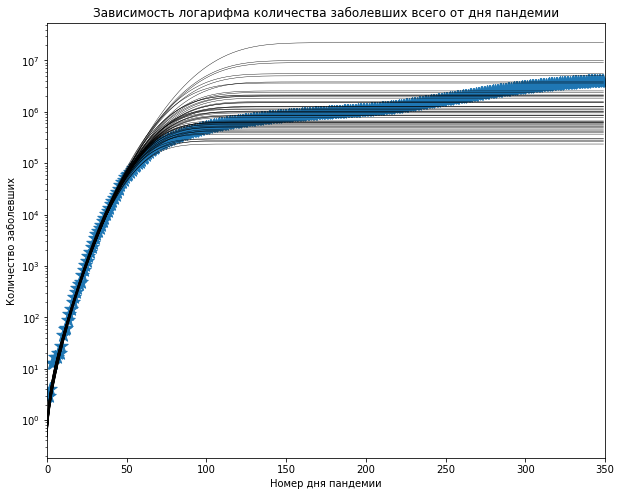

In [122]:
# График сэмплирования для визуализации
MAX_LEN = 350 # Количество учитываемых точек для графика

fig = plt.figure(figsize=(10, 8))
myplot_sample_gaus(mu_new, sigma_new, 50, points=corona_df_ru['total_cases'].values, len=MAX_LEN)
plt.xlim((0, MAX_LEN))
plt.ylabel('Количество заболевших')
plt.xlabel('Номер дня пандемии')
plt.title("Зависимость логарифма количества заболевших всего от дня пандемии")
plt.yscale('log')
plt.show()

**3.3.** Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?


In [117]:
end_date = transform_to_dayofyear(datetime.date(2021, 3, 1)) # Дата для получения данных 1 марта 2021

In [118]:
N_SAMPLES = 2000
LIMIT = end_date # Переменная достаточно далекого дня чтобы наш гауссиан сошелся

# fig = plt.figure(figsize=(16, 6))
weights = np.random.multivariate_normal(mu_new, sigma_new, N_SAMPLES)
y_pred = []
for w in weights:
    y_pred.append(np.cumsum(np.exp(w[0] * 1 + w[1] * np.arange(LIMIT) + w[2] * np.arange(LIMIT) ** 2))[-1])

In [124]:
print(f"Пессимистичные предсказания: {np.quantile(np.ravel(y_pred), 0.9)}")
print(f"Оптимистичные предсказания: {np.quantile(np.ravel(y_pred), 0.1)}")
# Похоже на правду, но я неверю что я все сделал правильно

Пессимистичные предсказания: 4888827.617093383
Оптимистичные предсказания: 323393.9377002639
